In [1]:
import os
import random
import numpy as np
import pandas as pd
import path
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split

In [2]:
! ls
print(os.getcwd())

company_information.csv  ga_signup_information.csv  tmp.csv
df_tmp.csv		 group.csv		    Untitled.ipynb
/home/shiya/Documents/FreeAgent


In [3]:
raw_info = pd.read_csv('company_information.csv', index_col = 'company_id')
display(raw_info.head())
raw_info.info()

,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices
company_id,,,,,,,
17729840,True,False,Cancelled,True,0,0,0
17711836,True,True,Subscribed,False,0,0,0
17712950,True,True,Subscribed,False,35,0,35
17723760,False,True,Subscribed,False,0,0,0
17713380,False,True,Subscribed,False,2,0,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 17729840 to 17729856
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   app_user                                  6299 non-null   bool  
 1   ever_contacted_support                    6299 non-null   bool  
 2   subscription_status                       5960 non-null   object
 3   left_trustpilot_review                    6299 non-null   bool  
 4   minutes_activity_last_7_days_mobile       6299 non-null   int64 
 5   minutes_activity_last_7_days_desktop      6299 non-null   int64 
 6   minutes_activity_last_7_days_all_devices  6299 non-null   int64 
dtypes: bool(3), int64(3), object(1)
memory usage: 264.5+ KB


In [4]:
raw_signup = pd.read_csv('ga_signup_information.csv', index_col = 'company_id')
display(raw_signup.head())
raw_signup.info()

,free_trial_signup_date,google_analytics_medium
company_id,,
17711836,2020-11-02,cpc
17712950,2020-11-08,cpc
17723760,2020-12-12,(none)
17713380,2020-11-09,cpc
17724228,2020-12-13,email


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6087 entries, 17711836 to 17734730
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   free_trial_signup_date   6087 non-null   object
 1   google_analytics_medium  6087 non-null   object
dtypes: object(2)
memory usage: 142.7+ KB


In [5]:
path

<module 'path' from '/home/shiya/anaconda3/lib/python3.9/site-packages/path/__init__.py'>

In [6]:
raw = pd.concat([raw_info, raw_signup], axis = 1)
if not os.path.exists('tmp.csv'):
    raw.to_csv('tmp.csv')
raw.head()

,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,free_trial_signup_date,google_analytics_medium
company_id,,,,,,,,,
17618213,False,True,Subscribed,False,62,0,155,2019-09-26,organic
17618220,False,True,Subscribed,False,0,0,0,2019-09-26,organic
17618245,False,True,Subscribed,False,0,0,0,2019-09-26,organic
17618260,True,True,Subscribed,False,0,0,0,2019-09-26,organic
17618265,True,True,Subscribed,False,0,0,0,2019-09-26,organic


In [7]:
display(raw.info())
raw.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6299 entries, 17618213 to 17737658
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   app_user                                  6299 non-null   bool  
 1   ever_contacted_support                    6299 non-null   bool  
 2   subscription_status                       5960 non-null   object
 3   left_trustpilot_review                    6299 non-null   bool  
 4   minutes_activity_last_7_days_mobile       6299 non-null   int64 
 5   minutes_activity_last_7_days_desktop      6299 non-null   int64 
 6   minutes_activity_last_7_days_all_devices  6299 non-null   int64 
 7   free_trial_signup_date                    6087 non-null   object
 8   google_analytics_medium                   6087 non-null   object
dtypes: bool(3), int64(3), object(3)
memory usage: 362.9+ KB


None

app_user                                      0
ever_contacted_support                        0
subscription_status                         339
left_trustpilot_review                        0
minutes_activity_last_7_days_mobile           0
minutes_activity_last_7_days_desktop          0
minutes_activity_last_7_days_all_devices      0
free_trial_signup_date                      212
google_analytics_medium                     212
dtype: int64

In [8]:
raw.free_trial_signup_date.dtype

dtype('O')

In [9]:
raw['free_trial_signup_date'] = pd.to_datetime(raw['free_trial_signup_date'], format =
                                               '%Y-%m-%d')

In [10]:
raw.free_trial_signup_date.dtype

dtype('<M8[ns]')

In [11]:
raw['day'] = raw['free_trial_signup_date'].dt.day_name()

In [12]:
raw.head()

,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,free_trial_signup_date,google_analytics_medium,day
company_id,,,,,,,,,,
17618213,False,True,Subscribed,False,62,0,155,2019-09-26,organic,Thursday
17618220,False,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
17618245,False,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
17618260,True,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
17618265,True,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday


In [13]:
df_daycount = raw['day'].value_counts()
df_daycount

Friday       1028
Monday       1006
Sunday        928
Saturday      922
Tuesday       904
Wednesday     670
Thursday      629
Name: day, dtype: int64

In [14]:
addlist = ['Saturday', 'Sunday']
weekend_percentage = sum([df_daycount[i] for i in addlist])/sum(df_daycount) * 100
weekend_percentage

30.392640052571053

In [15]:
df_email = raw.loc[raw['google_analytics_medium'] == 'email']
df_email.head()

,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,free_trial_signup_date,google_analytics_medium,day
company_id,,,,,,,,,,
17709779,False,True,Subscribed,False,0,0,0,2020-10-26,email,Monday
17709788,False,True,Subscribed,False,0,0,0,2020-10-26,email,Monday
17709881,False,True,Subscribed,False,0,0,1,2020-10-26,email,Monday
17710080,True,True,Subscribed,True,0,0,8,2020-10-06,email,Tuesday
17710517,True,True,Subscribed,True,0,0,0,2020-10-07,email,Wednesday


In [16]:
df_email_daycount = df_email['day'].value_counts()
df_email_daycount

Monday       89
Sunday       86
Saturday     83
Tuesday      70
Friday       70
Wednesday    66
Thursday     58
Name: day, dtype: int64

In [17]:
email_percentage = sum([df_email_daycount[i] for i in addlist])/sum(df_email_daycount) * 100
print('_____________________________________')
print('The percentage of companies signed up for trials, directed by emails is: ', 
      f'{email_percentage:.2f}%')
print('_____________________________________')

_____________________________________
The percentage of companies signed up for trials, directed by emails is:  32.38%
_____________________________________


In [18]:
raw.subscription_status.unique()

array(['Subscribed', nan, 'Cancelled'], dtype=object)

In [19]:
df_sub = raw.loc[raw['subscription_status'] == 'Subscribed']
df_sub.subscription_status.unique()

array(['Subscribed'], dtype=object)

In [20]:
df_app_user = df_sub.app_user.value_counts()

In [21]:
print('_____________________________________')
print(f"{'The percentage of subsrcribed users who are app user is: ':<65}\
{df_app_user[True]/df_app_user.sum() *100:.2f}%")
print(f"{'The percentage of subsrcribed users who are app user is: ':<65}\
{df_app_user[False]/df_app_user.sum() *100:.2f}%")
print('_____________________________________')

_____________________________________
The percentage of subsrcribed users who are app user is:         38.57%
The percentage of subsrcribed users who are app user is:         61.43%
_____________________________________


# Question 3

In [22]:
df_average_minute = raw.loc[raw['free_trial_signup_date'] >= '2020-07-01']
df_average_minute = df_average_minute.reset_index() \
                    .set_index('free_trial_signup_date').sort_index() \
                    [['minutes_activity_last_7_days_all_devices', 'google_analytics_medium']]
df_average_minute

,minutes_activity_last_7_days_all_devices,google_analytics_medium
free_trial_signup_date,,
2020-07-01,0,organic
2020-07-01,76,organic
2020-07-01,2,organic
2020-07-01,0,organic
2020-07-01,0,organic
...,...,...
2021-01-25,9,(none)
2021-01-25,25,organic
2021-01-25,52,email


In [23]:
df_average_minute['google_analytics_medium'] = df_average_minute['google_analytics_medium']

In [24]:
def to_categorical(data):
    data_group = data['google_analytics_medium'].\
                    groupby('free_trial_signup_date').value_counts()
    data_group = data_group.unstack().resample('M').mean()
    data_group.index = pd.to_datetime(data_group.index).strftime('%Y-%m')
    data_group.plot(kind = 'bar', figsize = (8, 8))

In [25]:
df_date_group = df_average_minute['google_analytics_medium'].replace('(none)', np.nan). \
                groupby('free_trial_signup_date').value_counts()
df_date_group.tail()

free_trial_signup_date  google_analytics_medium
2021-01-24              cpc                        14
                        organic                     9
2021-01-25              cpc                        16
                        email                      13
                        organic                     5
Name: google_analytics_medium, dtype: int64

In [26]:
df_tmp = df_date_group.to_frame().google_analytics_medium.unstack()

In [27]:
df = df_tmp.resample('M').mean()
df.index = pd.to_datetime(df.index).strftime('%Y-%m')

In [28]:
cols = ['cpc', 'email', 'organic', 'social']
df_dict = df.copy()
df_dict[cols] = df_dict[cols].div(df_dict[cols].sum(axis = 1), axis = 0)
prob_dict = df_dict.transpose().replace(np.nan, 0).to_dict()
prob_dict

{'2020-07': {'cpc': 0.0, 'email': 0.0, 'organic': 1.0, 'social': 0.0},
 '2020-08': {'cpc': 0.0, 'email': 0.0, 'organic': 1.0, 'social': 0.0},
 '2020-09': {'cpc': 0.0, 'email': 0.0, 'organic': 1.0, 'social': 0.0},
 '2020-10': {'cpc': 0.23912425362524878,
  'email': 0.09894796701734432,
  'organic': 0.6619277793574069,
  'social': 0.0},
 '2020-11': {'cpc': 0.3457332030025267,
  'email': 0.25534387045609636,
  'organic': 0.2982239353755925,
  'social': 0.10069899116578448},
 '2020-12': {'cpc': 0.4351084390301623,
  'email': 0.24924730334567322,
  'organic': 0.23067358602904853,
  'social': 0.08497067159511586},
 '2021-01': {'cpc': 0.3788369382204377,
  'email': 0.41497215386607944,
  'organic': 0.16085999222898584,
  'social': 0.04533091568449682}}

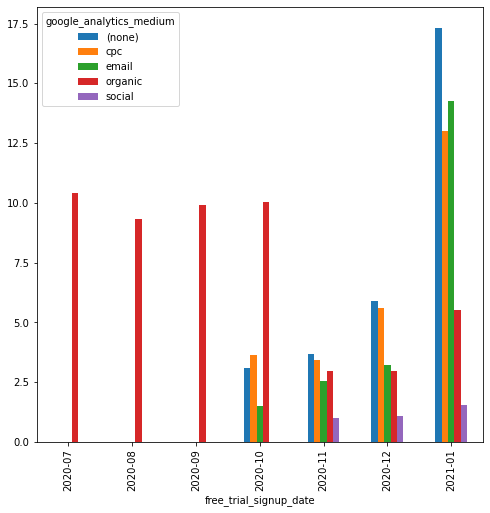

In [29]:
to_categorical(df_average_minute)

In [30]:
def medium_fill(row, *arg):
    if not pd.isnull(row[0]):
        return row.item()
    else:
        date = pd.to_datetime(row.name).strftime('%Y-%m')
        return np.random.choice(list(prob_dict[date].keys()), p = list(prob_dict[date].values()))

In [31]:
df_average_minute['google_analytics_medium']

free_trial_signup_date
2020-07-01    organic
2020-07-01    organic
2020-07-01    organic
2020-07-01    organic
2020-07-01    organic
               ...   
2021-01-25     (none)
2021-01-25    organic
2021-01-25      email
2021-01-25      email
2021-01-25      email
Name: google_analytics_medium, Length: 3412, dtype: object

In [32]:
df_average_minute['google_analytics_medium'].to_frame()

,google_analytics_medium
free_trial_signup_date,
2020-07-01,organic
2020-07-01,organic
2020-07-01,organic
2020-07-01,organic
2020-07-01,organic
...,...
2021-01-25,(none)
2021-01-25,organic
2021-01-25,email


In [33]:
df_average_tmp = df_average_minute.copy()

In [34]:
df_average_tmp['google_analytics_medium'] = df_average_tmp['google_analytics_medium'].to_frame() \
.replace('(none)', np.nan).apply(lambda x: medium_fill(x), axis = 1)
display(df_average_tmp)

,minutes_activity_last_7_days_all_devices,google_analytics_medium
free_trial_signup_date,,
2020-07-01,0,organic
2020-07-01,76,organic
2020-07-01,2,organic
2020-07-01,0,organic
2020-07-01,0,organic
...,...,...
2021-01-25,9,email
2021-01-25,25,organic
2021-01-25,52,email


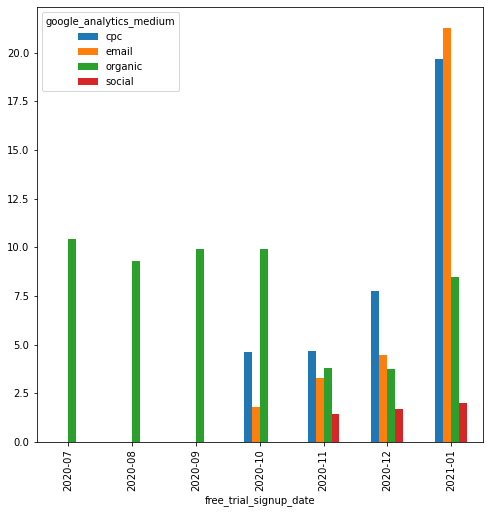

In [35]:
to_categorical(df_average_tmp)

In [36]:
df_average_tmp.isnull().sum()

minutes_activity_last_7_days_all_devices    0
google_analytics_medium                     0
dtype: int64

In [37]:
df_average = df_average_tmp.groupby('google_analytics_medium').mean()
df_average.head()

,minutes_activity_last_7_days_all_devices
google_analytics_medium,
cpc,4.469231
email,2.347044
organic,3.601216
social,2.797468


In [38]:
print('The medium with the most activity minutes over the last 7 days is cpc, \n', 
      'with an average of ', f"{float(df_average.loc['cpc']):.2f} minutes.")

The medium with the most activity minutes over the last 7 days is cpc, 
 with an average of  4.47 minutes.


In [39]:
print(df_average_minute)

                        minutes_activity_last_7_days_all_devices  \
free_trial_signup_date                                             
2020-07-01                                                     0   
2020-07-01                                                    76   
2020-07-01                                                     2   
2020-07-01                                                     0   
2020-07-01                                                     0   
...                                                          ...   
2021-01-25                                                     9   
2021-01-25                                                    25   
2021-01-25                                                    52   
2021-01-25                                                     2   
2021-01-25                                                     2   

                       google_analytics_medium  
free_trial_signup_date                          
2020-07-01       

In [40]:
def average_sim(data = df_average_minute, sim_num = 10, prob = prob_dict):
    df_sim = None
    for i in range(sim_num):
        np.random.seed(i)
        tmp = df_average_minute.copy()
        tmp['google_analytics_medium'] = tmp['google_analytics_medium'].to_frame() \
            .replace('(none)', np.nan).apply(lambda x: medium_fill(x, i), axis = 1)
        tmp = tmp.groupby('google_analytics_medium').mean()
        if df_sim is None:
            df_sim = tmp 
        else:
            df_sim = df_sim.merge(tmp, left_index = True, right_index = True, how = 'outer',  suffixes = (None, f'_{i}'))
    return df_sim
        

In [41]:
ave = average_sim(sim_num = 500)

In [42]:
ave.transpose().head(5)

google_analytics_medium,cpc,email,organic,social
minutes_activity_last_7_days_all_devices,4.384951,2.456693,3.643769,1.715909
minutes_activity_last_7_days_all_devices_1,4.316315,2.534615,3.726776,0.404762
minutes_activity_last_7_days_all_devices_2,3.381421,1.850455,4.528131,0.480000
minutes_activity_last_7_days_all_devices_3,4.550725,1.915723,3.770681,3.078947
minutes_activity_last_7_days_all_devices_4,4.254162,2.679124,3.689927,0.517241


In [43]:
ave['average'] = ave.mean(axis = 1)

In [44]:
ave['average']

google_analytics_medium
cpc        3.470893
email      2.716682
organic    3.972091
social     2.860453
Name: average, dtype: float64

In [45]:
print("After 500 simulation according to the distribution of medium, the users from organic medium tend to spend more time on the services, with an average of ", f"{ave['average'].loc['organic']:.2f}" , "minutes")

After 500 simulation according to the distribution of medium, the users from organic medium tend to spend more time on the services, with an average of  3.97 minutes


In [46]:
ave_1000 = average_sim(sim_num = 1000)

In [47]:
ave_1000['average'] = ave_1000.mean(axis = 1)

In [48]:
ave_1000['average']

google_analytics_medium
cpc        3.454089
email      2.735893
organic    3.966731
social     2.965271
Name: average, dtype: float64

Similarly, for 1000 simulation, the result is till the organic medium, with average of 3.97 minutes.

In [49]:
raw

,app_user,ever_contacted_support,subscription_status,left_trustpilot_review,minutes_activity_last_7_days_mobile,minutes_activity_last_7_days_desktop,minutes_activity_last_7_days_all_devices,free_trial_signup_date,google_analytics_medium,day
company_id,,,,,,,,,,
17618213,False,True,Subscribed,False,62,0,155,2019-09-26,organic,Thursday
17618220,False,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
17618245,False,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
17618260,True,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
17618265,True,True,Subscribed,False,0,0,0,2019-09-26,organic,Thursday
...,...,...,...,...,...,...,...,...,...,...
17737650,False,False,Cancelled,False,0,0,0,2021-01-25,cpc,Monday
17737651,True,False,Cancelled,False,13,0,13,2021-01-25,(none),Monday
17737652,False,False,Cancelled,False,0,67,67,2021-01-25,email,Monday


In [50]:
df_review = raw[['left_trustpilot_review', 'subscription_status']].groupby('left_trustpilot_review')['subscription_status'].value_counts()

<AxesSubplot:xlabel='left_trustpilot_review'>

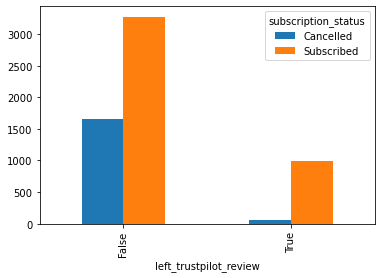

In [51]:
df_review.unstack().plot(kind = 'bar')

In [52]:
df_support = raw[['ever_contacted_support', 'subscription_status']].\
                groupby('subscription_status')['ever_contacted_support'].value_counts()

In [53]:
df_support

subscription_status  ever_contacted_support
Cancelled            False                     1661
                     True                        42
Subscribed           True                      3905
                     False                      352
Name: ever_contacted_support, dtype: int64

<AxesSubplot:xlabel='subscription_status'>

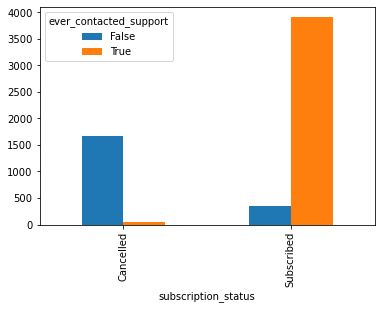

In [54]:
df_support.unstack().plot(kind = 'bar')

In [55]:
df_support.unstack()

ever_contacted_support,False,True
subscription_status,,
Cancelled,1661,42
Subscribed,352,3905


In [56]:
df_app = raw[['app_user', 'subscription_status']].\
                groupby('subscription_status')['app_user'].value_counts()

<AxesSubplot:xlabel='subscription_status'>

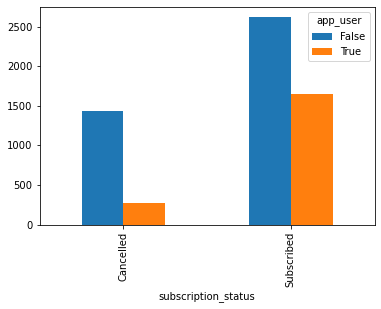

In [57]:
df_app.unstack().plot(kind = 'bar')

In [61]:
df_subscrip = raw[['subscription_status', 'app_user', 'ever_contacted_support']]
df_subscrip.head()

,subscription_status,app_user,ever_contacted_support
company_id,,,
17618213,Subscribed,False,True
17618220,Subscribed,False,True
17618245,Subscribed,False,True
17618260,Subscribed,True,True
17618265,Subscribed,True,True


In [63]:
df_train, df_eval = train_test_split(df_subscrip, train_size = 0.7)

In [64]:
df_train, df_test = train_test_split(df_train, train_size = 0.8)

In [ ]:
def data_prep(data):
    